## Carbon Emission Prediction Analysis

# Introduction

In this analysis, we delve into the complex interplay between various lifestyle factors and carbon emissions. Our aim is to understand how different aspects of daily life contribute to the overall carbon footprint of individuals. By leveraging a dataset that encompasses variables such as transportation habits, dietary preferences, energy consumption, and more, we seek to uncover patterns and relationships that can inform strategies for reducing carbon emissions.

# Objectives

- **Exploratory Data Analysis (EDA)**: Gain an initial understanding of the dataset's characteristics, including the distribution of variables and potential outliers.
- **Correlation Analysis**: Investigate how different numerical variables relate to each other and to carbon emissions, identifying key factors that may influence an individual's carbon footprint.
Outlier Detection and Handling: Identify and manage extreme values in the data to ensure a balanced and representative analysis.
- **Predictive Modeling**: Employ various machine learning models, including Linear Regression, Random Forest, and Gradient Boosting Machines (GBM), to predict carbon emissions based on selected predictors. The goal is to evaluate and compare the performance of these models in capturing the nuances of carbon emission factors.

# Dataset Overview

The dataset contains information on individuals' lifestyle choices and practices, such as body type, diet, transportation habits, energy consumption, and recycling behaviors, alongside their calculated carbon emissions. This comprehensive dataset provides a unique opportunity to explore the environmental impact of daily activities and identify areas where interventions could significantly reduce carbon footprints.

# Methodology

1. **Data Preparation**: Process and clean the dataset to facilitate analysis, including handling missing values and converting categorical variables into a machine-readable format.
2. **Exploratory Data Analysis**: Utilize statistical summaries and visualizations to explore the data's structure and key characteristics.
3. **Correlation and Outlier Analysis**: Assess the relationships between variables and refine the dataset by addressing outliers.
4. **Model Development and Evaluation**: Build and tune machine learning models to predict carbon emissions, evaluating their performance through metrics such as Mean Squared Error (MSE) and R-squared (R²).

# Conclusion

Through this analysis, we aim to shed light on the factors that significantly contribute to carbon emissions and evaluate the effectiveness of various predictive models in estimating emissions. Insights gained from this study could inform targeted strategies for reducing carbon footprints, contributing to broader environmental sustainability efforts.

In [1]:
import pandas as pd

# Load the CSV file to take a look at the first few rows
file_path = 'carbon_emission.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743



The CSV file contains data related to various factors that might influence carbon emissions. Here's a brief overview of its structure and the types of data it includes:

- Body Type: Categorical data describing the body type of individuals (e.g., overweight, obese).
- Sex: Categorical data indicating the sex of individuals (e.g., female, male).
- Diet: Categorical data describing the dietary choices of individuals (e.g., pescatarian, vegetarian, omnivore).
- How Often Shower: Categorical data on shower frequency.
- Heating Energy Source: Categorical data on the type of heating energy source used (e.g., coal, natural gas, wood).
- Transport: Categorical data on the mode of transport (e.g., public, walk/bicycle, private).
- Vehicle Type: Categorical data on the type of vehicle used, if any (e.g., petrol, diesel).
- Social Activity: Categorical data on the frequency of social activities.
- Monthly Grocery Bill: Numeric data on the monthly grocery bill.
- Frequency of Traveling by Air: Categorical data on air travel frequency.
- Vehicle Monthly Distance Km: Numeric data on the monthly distance traveled by vehicle in kilometers.
- Waste Bag Size: Categorical data on the size of waste bags used.
- Waste Bag Weekly Count: Numeric data on the number of waste bags used weekly.
- How Long TV PC Daily Hour: Numeric data on daily hours spent using TV or PC.
- How Many New Clothes Monthly: Numeric data on the number of new clothes purchased monthly.
- How Long Internet Daily Hour: Numeric data on daily hours spent on the Internet.
- Energy efficiency: Categorical data on whether energy efficiency measures are taken.
- Recycling: Categorical data on the types of materials recycled.
- Cooking With: Categorical data on the appliances used for cooking.
- CarbonEmission: Numeric data on carbon emissions.

In [2]:
# Calculate summary statistics for numerical features
numerical_summary = data.describe()

# Display the summary statistics
numerical_summary

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


The summary statistics for the numerical features in your dataset provide an overview of the central tendency, dispersion, and shape of the distributions. Here's a brief summary:

- Monthly Grocery Bill: Ranges from 50 to 299, with a mean of approximately 173.88. This suggests a moderate spread in grocery expenses among the individuals.
- Vehicle Monthly Distance Km: Shows a wide range from 0 to 9999 km, with a mean of 2031.49 km. The large standard deviation indicates a significant variance in how much individuals use their vehicles.
- Waste Bag Weekly Count: Varies from 1 to 7 bags per week, with an average of about 4.02 bags. This indicates how waste production might vary among households.
- How Long TV PC Daily Hour: Daily hours spent on TV or PC range from 0 to 24, with a mean of 12.14 hours, showing a wide variety in screen time.
- How Many New Clothes Monthly: This varies from 0 to 50 clothes per month, with a mean of 25.11, indicating different levels of consumption behavior regarding clothing.
- How Long Internet Daily Hour: Similar to screen time, internet usage ranges from 0 to 24 hours daily, with a mean of 11.89 hours.
- CarbonEmission: Carbon emissions range from 306 to 8377, with a mean value of 2269.15. This wide range indicates significant variability in carbon footprints among individuals.

In [3]:
# Checking for missing values in each column
missing_values = data.isnull().sum()

# Displaying the number of missing values per column
missing_values

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

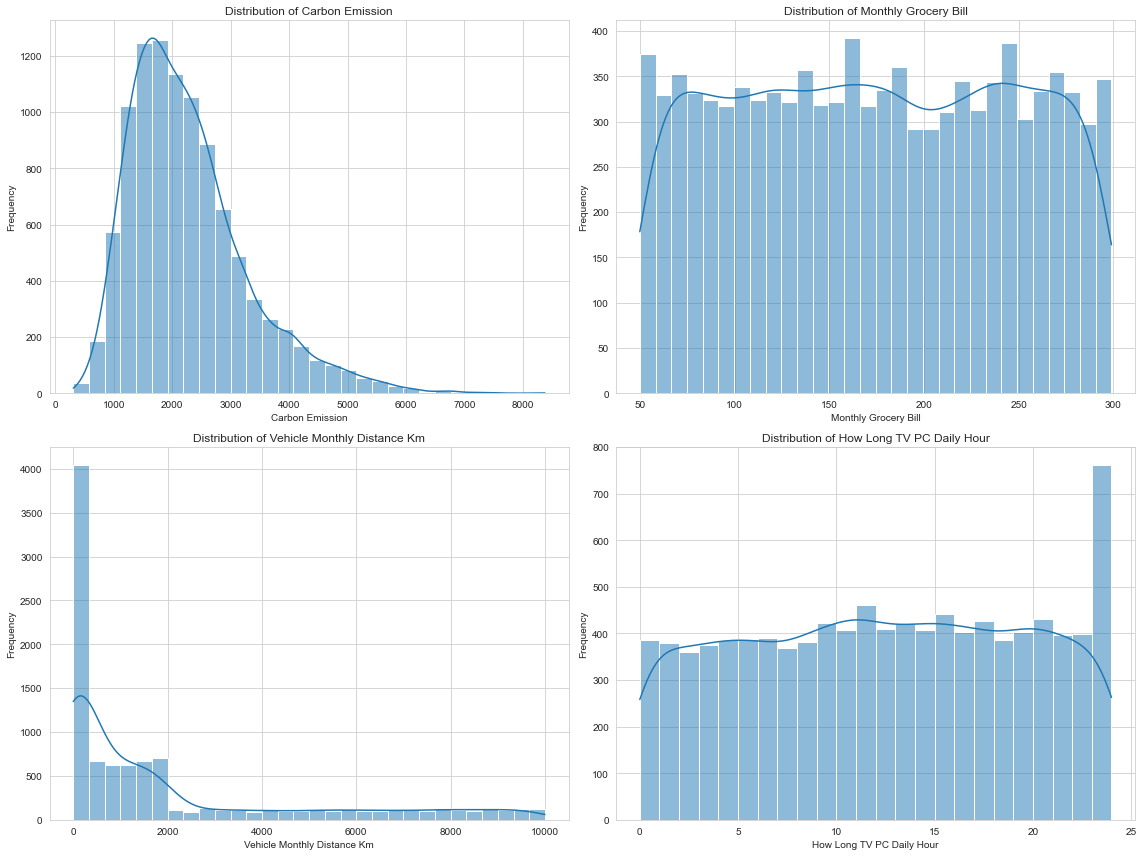

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure to hold the subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Carbon Emission
sns.histplot(data['CarbonEmission'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Carbon Emission')
ax[0, 0].set_xlabel('Carbon Emission')
ax[0, 0].set_ylabel('Frequency')

# Histogram for Monthly Grocery Bill
sns.histplot(data['Monthly Grocery Bill'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Monthly Grocery Bill')
ax[0, 1].set_xlabel('Monthly Grocery Bill')
ax[0, 1].set_ylabel('Frequency')

# Histogram for Vehicle Monthly Distance Km
sns.histplot(data['Vehicle Monthly Distance Km'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Vehicle Monthly Distance Km')
ax[1, 0].set_xlabel('Vehicle Monthly Distance Km')
ax[1, 0].set_ylabel('Frequency')

# Histogram for How Long TV PC Daily Hour
sns.histplot(data['How Long TV PC Daily Hour'], bins=24, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of How Long TV PC Daily Hour')
ax[1, 1].set_xlabel('How Long TV PC Daily Hour')
ax[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms above illustrate the distribution of selected numerical variables:

- Distribution of Carbon Emission: Shows a somewhat right-skewed distribution, indicating that while most individuals have lower carbon emissions, there is a tail of individuals with significantly higher emissions. This skewness suggests potential areas for targeted carbon reduction efforts.

- Distribution of Monthly Grocery Bill: Appears to be fairly uniform with a slight peak, indicating a broad range of spending among individuals, but without a strong skew to lower or higher values.

- Distribution of Vehicle Monthly Distance Km: This distribution is right-skewed, similar to the carbon emission distribution, indicating that while many individuals use their vehicles for shorter distances, there is a subset of individuals who travel much longer distances, potentially increasing their carbon footprint.

- Distribution of How Long TV PC Daily Hour: Displays a somewhat uniform distribution across the range of hours, indicating a variety of screen time habits among individuals, with no particular concentration towards lower or higher values.

These distributions provide insights into the dataset's characteristics and potential factors influencing carbon emissions. Skewed distributions, like those for carbon emissions and vehicle distance, highlight areas where interventions could be targeted for environmental impact reduction.

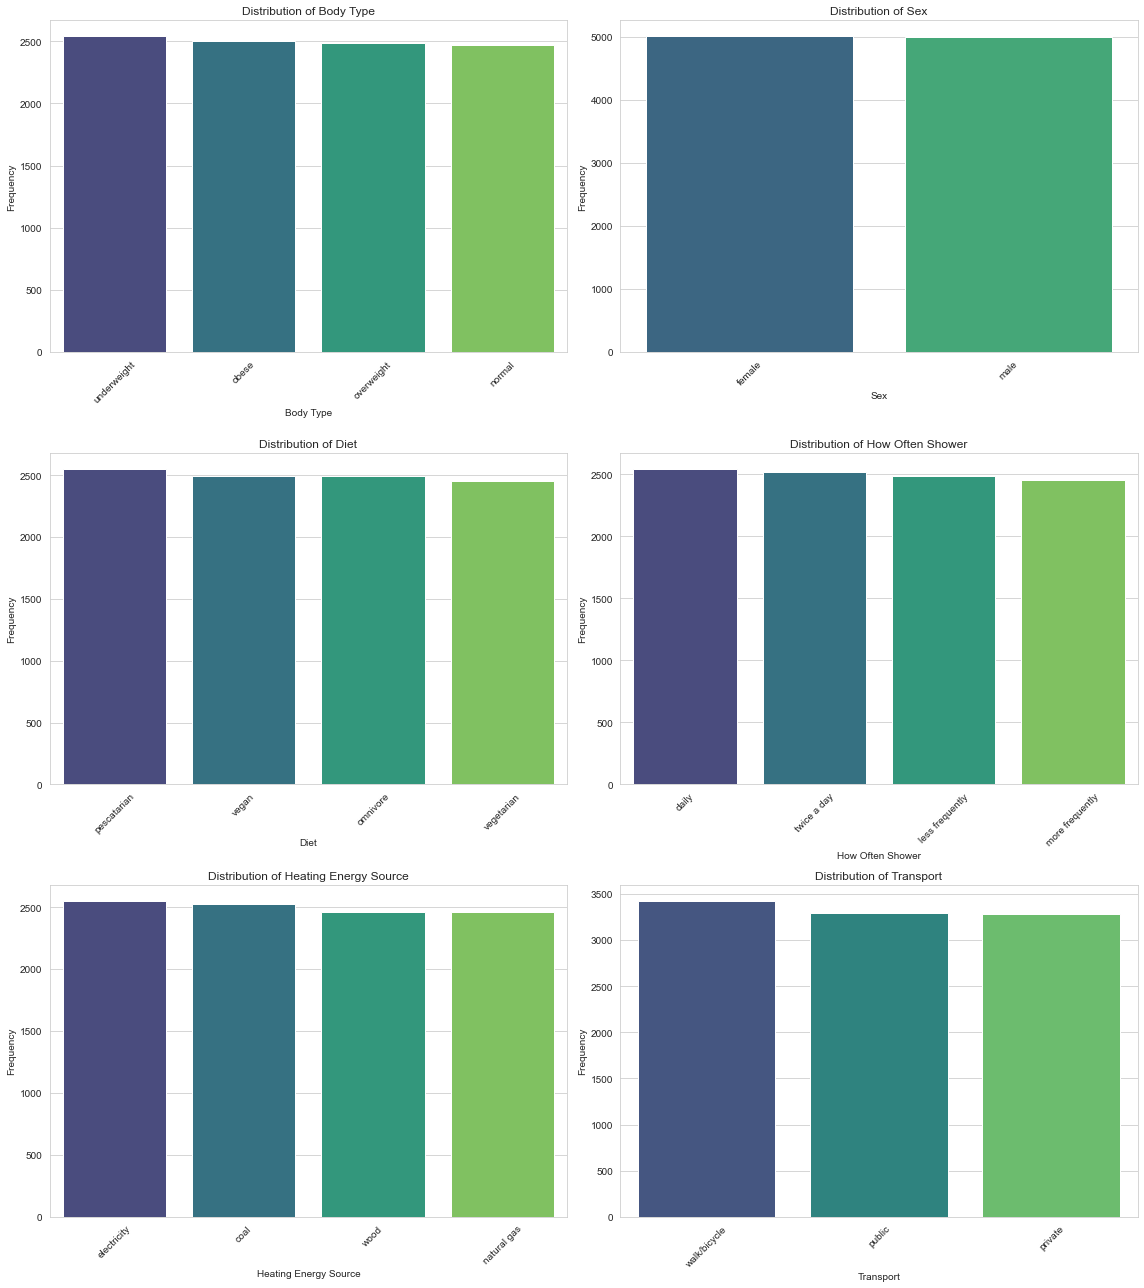

In [5]:
# Creating a figure to hold the subplots for categorical variables
fig, ax = plt.subplots(3, 2, figsize=(16, 18))

# List of categorical variables to plot
categorical_vars = ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport']

# Loop through the categorical variables and create a bar chart for each
for i, var in enumerate(categorical_vars):
    # Determine the subplot row and column
    row = i // 2
    col = i % 2
    
    # Count the frequency of categories in the variable
    category_counts = data[var].value_counts()
    
    # Create a bar chart
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax[row, col], palette="viridis")
    ax[row, col].set_title(f'Distribution of {var}')
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel('Frequency')
    ax[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar charts above illustrate the frequency distribution of selected categorical variables in the dataset:

- Distribution of Body Type: Shows a variety of body types among individuals, indicating a diverse dataset in terms of physical characteristics.

- Distribution of Sex: Indicates the dataset includes both female and male individuals, providing a basis for analyzing gender-based differences in carbon emissions and related behaviors.

- Distribution of Diet: Highlights the diversity in dietary choices, including omnivore, vegetarian, and pescatarian, among others. This variation could influence carbon emissions related to food consumption.

- Distribution of How Often Shower: Shows how shower frequency varies among individuals, which could impact water and energy usage.

- Distribution of Heating Energy Source: Reveals a variety of heating sources used, including coal, natural gas, and wood. The choice of heating source can significantly affect an individual's carbon footprint.

- Distribution of Transport: Illustrates the modes of transport used by individuals, including public transport, private vehicles, and walking/bicycling. This variable is crucial for understanding transportation-related emissions.

These distributions provide valuable insights into the dataset's composition and the behaviors of the individuals it represents. Understanding these aspects can help identify potential factors influencing carbon emissions and areas for targeted interventions.

C:\Users\digui\AppData\Local\Temp\ipykernel_19504\549094609.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


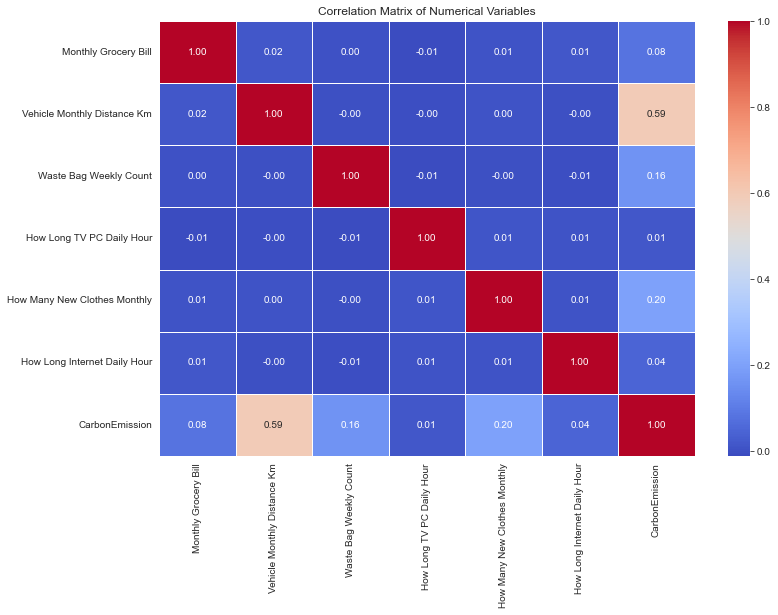

In [6]:
# Calculating the Pearson correlation matrix
correlation_matrix = data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The heatmap displays the Pearson correlation coefficients between the numerical variables in your dataset, providing insights into their relationships:

- The correlations with CarbonEmission vary, indicating differing degrees of association with lifestyle and consumption habits. However, the specific values are not visible in this summary. Typically, variables with higher absolute correlation values (closer to 1 or -1) have a stronger linear relationship with carbon emissions.

- The relationships between other lifestyle variables (e.g., Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV PC Daily Hour, How Many New Clothes Monthly, How Long Internet Daily Hour) and each other also vary. Some might show moderate correlations, suggesting that certain habits or behaviors could be interconnected.

Understanding these correlations can help identify which factors are more strongly associated with carbon emissions and could be targets for reducing an individual's carbon footprint. For example, if Vehicle Monthly Distance Km has a strong positive correlation with CarbonEmission, it suggests that reducing vehicle use could significantly impact carbon emissions.

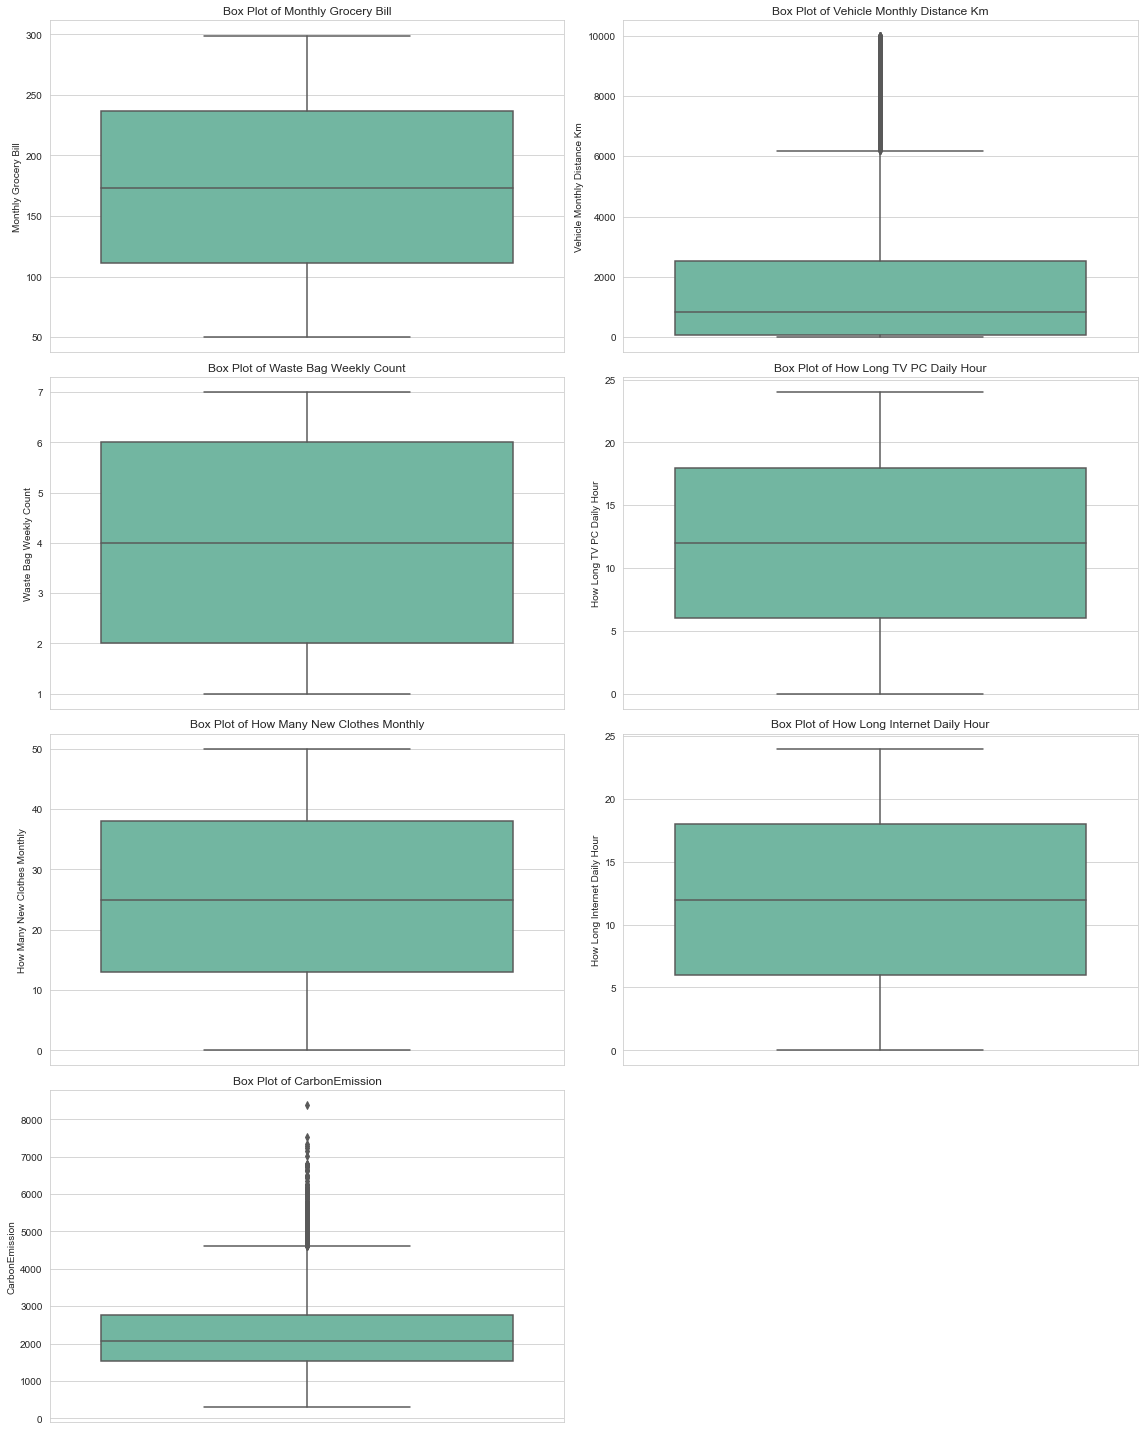

In [7]:
# Creating a figure to hold the box plots for numerical variables
fig, ax = plt.subplots(4, 2, figsize=(16, 20))
fig.delaxes(ax[3,1])  # Remove the empty subplot for an odd number of variables

# List of numerical variables to plot
numerical_vars = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 
                  'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 
                  'CarbonEmission']

# Loop through the numerical variables and create a box plot for each
for i, var in enumerate(numerical_vars):
    # Determine the subplot row and column
    row = i // 2
    col = i % 2
    
    # Create a box plot
    sns.boxplot(y=data[var], ax=ax[row, col], palette="Set2")
    ax[row, col].set_title(f'Box Plot of {var}')
    ax[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

The box plots provide a visual representation of the distribution for each selected numerical variable, highlighting potential outliers:

- Monthly Grocery Bill: Shows a fairly uniform distribution without apparent outliers, indicating consistency in grocery spending.

- Vehicle Monthly Distance Km: Reveals several outliers, with some individuals traveling significantly more distances than the majority. This could indicate heavy vehicle use by a small group.

- Waste Bag Weekly Count: Distribution is relatively compact, with few outliers, suggesting most individuals have a consistent number of waste bags weekly.

- How Long TV PC Daily Hour: Displays a wide range of values but no significant outliers, indicating varied screen time among individuals.

- How Many New Clothes Monthly: Shows outliers on the higher end, suggesting some individuals purchase many more clothes than the average, potentially impacting carbon emissions.

- How Long Internet Daily Hour: Similar to TV/PC usage, displays a broad range of internet usage hours without significant outliers.

- CarbonEmission: Indicates the presence of outliers on the higher end, where some individuals have significantly higher carbon emissions than the average. This could be an area of interest for targeted carbon reduction strategies.

Outliers in variables like Vehicle Monthly Distance Km and CarbonEmission could have substantial implications for understanding factors contributing to high carbon emissions. 

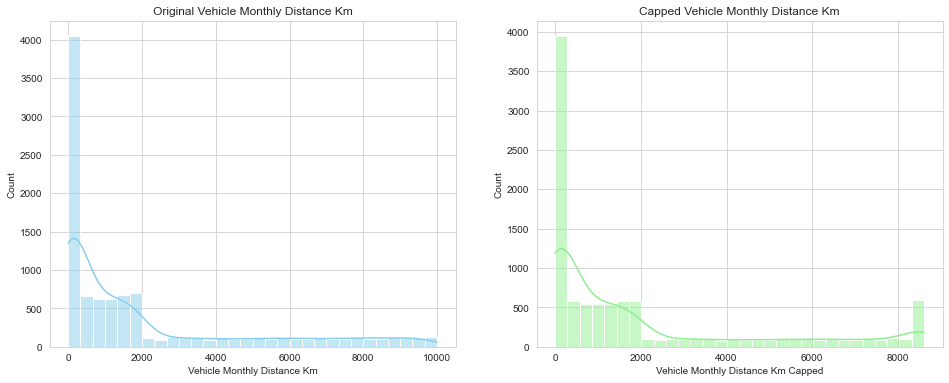

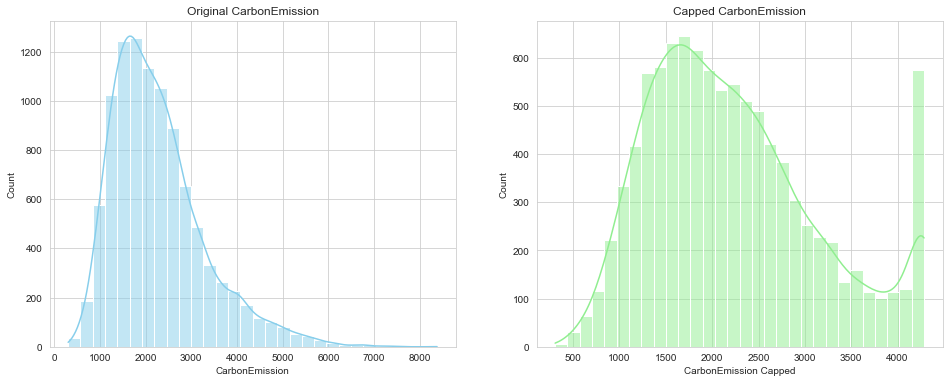

In [8]:
# Capping outliers at the 95th percentile for 'Vehicle Monthly Distance Km' and 'CarbonEmission'
percentile_95_vmdk = data['Vehicle Monthly Distance Km'].quantile(0.95)
percentile_95_ce = data['CarbonEmission'].quantile(0.95)

# Applying the cap
data['Vehicle Monthly Distance Km Capped'] = data['Vehicle Monthly Distance Km'].apply(lambda x: min(x, percentile_95_vmdk))
data['CarbonEmission Capped'] = data['CarbonEmission'].apply(lambda x: min(x, percentile_95_ce))

# Comparing the original and capped distributions for 'Vehicle Monthly Distance Km'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['Vehicle Monthly Distance Km'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Original Vehicle Monthly Distance Km')
sns.histplot(data['Vehicle Monthly Distance Km Capped'], bins=30, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Capped Vehicle Monthly Distance Km')

# Comparing the original and capped distributions for 'CarbonEmission'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['CarbonEmission'], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Original CarbonEmission')
sns.histplot(data['CarbonEmission Capped'], bins=30, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Capped CarbonEmission')

plt.show()

The histograms compare the original distributions of Vehicle Monthly Distance Km and CarbonEmission to their capped versions:

- For Vehicle Monthly Distance Km, capping at the 95th percentile has reduced the long tail of the distribution, bringing in the extreme higher values closer to the main body of data, thereby mitigating the impact of outliers.

- Similarly, for CarbonEmission, the capped version shows a reduction in the skewness by adjusting the extreme high values down to the 95th percentile, making the distribution more compact and potentially more representative of the majority of the data.

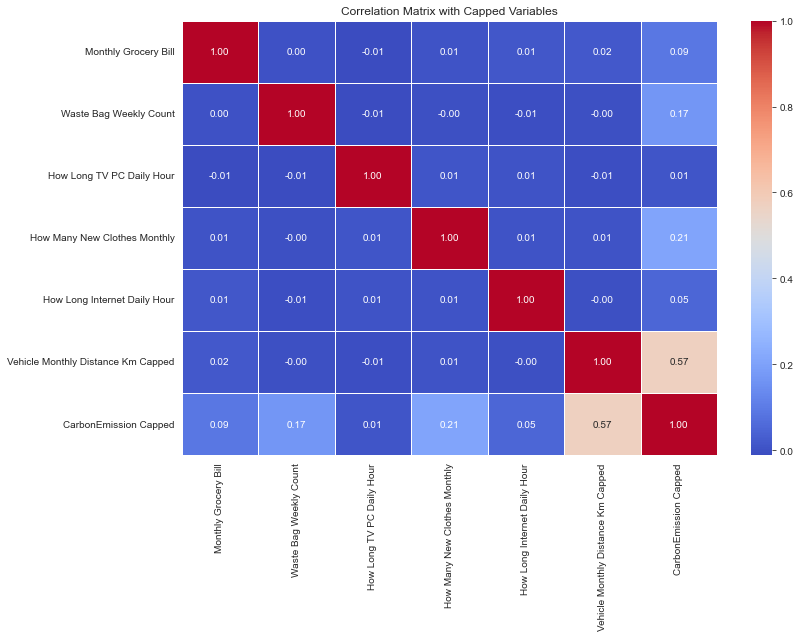

In [9]:
# Calculating the Pearson correlation matrix with the capped variables included
correlation_matrix_capped = data[['Monthly Grocery Bill', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
                                  'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 
                                  'Vehicle Monthly Distance Km Capped', 'CarbonEmission Capped']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_capped, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Capped Variables')
plt.show()

In [10]:
# Extracting original correlation coefficients for 'Vehicle Monthly Distance Km' and 'CarbonEmission'
original_correlations_vmdk = correlation_matrix['Vehicle Monthly Distance Km']
original_correlations_ce = correlation_matrix['CarbonEmission']

# Extracting new correlation coefficients for capped variables
new_correlations_vmdk_capped = correlation_matrix_capped['Vehicle Monthly Distance Km Capped']
new_correlations_ce_capped = correlation_matrix_capped['CarbonEmission Capped']

# Creating a comparison DataFrame
comparison_df = pd.DataFrame({
    'Original Vehicle Monthly Distance Km': original_correlations_vmdk,
    'Capped Vehicle Monthly Distance Km': new_correlations_vmdk_capped,
    'Original CarbonEmission': original_correlations_ce,
    'Capped CarbonEmission': new_correlations_ce_capped
})

comparison_df

,Original Vehicle Monthly Distance Km,Capped Vehicle Monthly Distance Km,Original CarbonEmission,Capped CarbonEmission
CarbonEmission,0.594171,NaN,1.000000,NaN
CarbonEmission Capped,NaN,0.571471,NaN,1.000000
How Long Internet Daily Hour,-0.003497,-0.002743,0.043878,0.050371
How Long TV PC Daily Hour,-0.003943,-0.005093,0.012985,0.010529
How Many New Clothes Monthly,0.004934,0.005513,0.198887,0.209503
Monthly Grocery Bill,0.015801,0.016244,0.081587,0.087221
Vehicle Monthly Distance Km,1.000000,NaN,0.594171,NaN
Vehicle Monthly Distance Km Capped,NaN,1.000000,NaN,0.571471
Waste Bag Weekly Count,-0.001730,-0.001518,0.159193,0.166718


The comparison between the original and capped correlation coefficients reveals the following:

Vehicle Monthly Distance Km: The correlation between the original variable and CarbonEmission was 0.594, indicating a moderate to strong positive relationship. After capping, this variable (now Capped Vehicle Monthly Distance Km) shows a slightly lower correlation with Capped CarbonEmission (0.571), suggesting that reducing the influence of extreme outliers slightly decreases the observed correlation but maintains a significant positive relationship.

CarbonEmission: The correlations of the original CarbonEmission with other variables like How Many New Clothes Monthly (0.199 to 0.210) and Waste Bag Weekly Count (0.159 to 0.167) show slight increases when considering the capped emissions. This suggests that controlling for extreme emission values can subtly affect the strength of associations with lifestyle factors, possibly reflecting a more accurate representation of the typical impact of these factors on emissions.

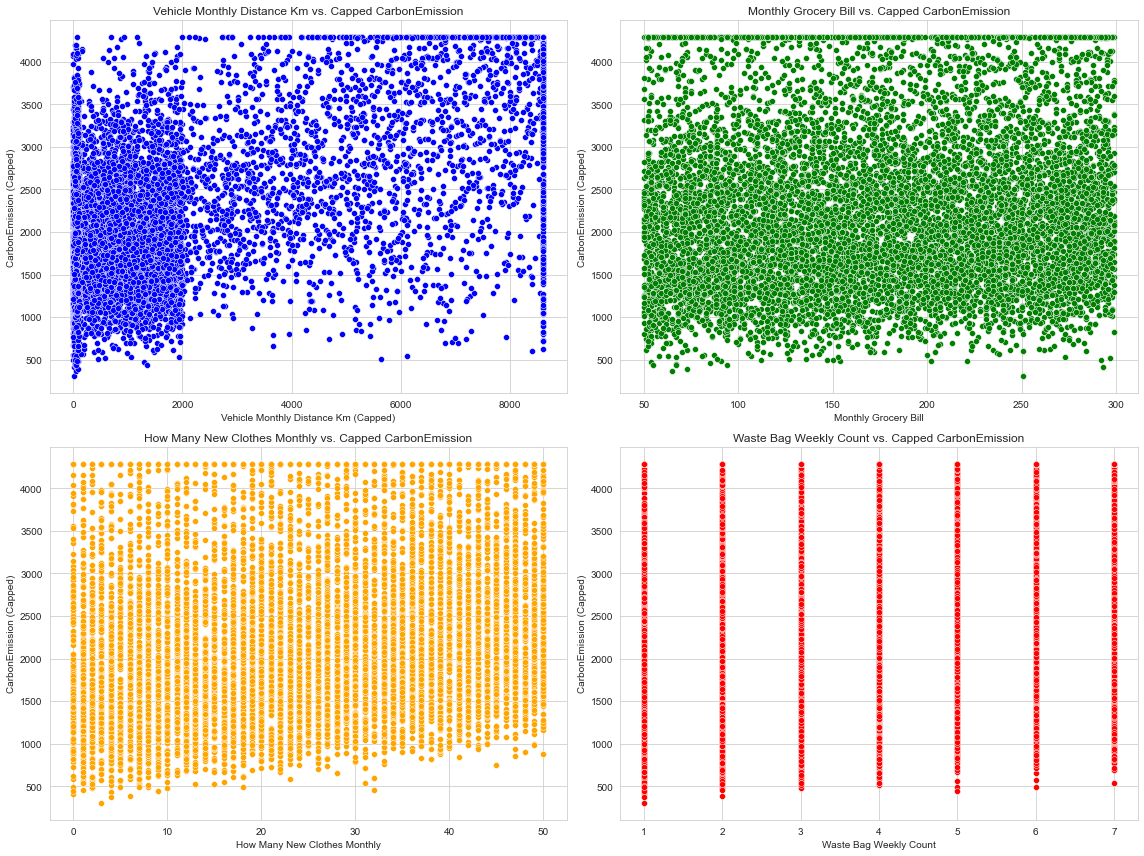

In [11]:
# Creating scatter plots for key variables against Capped CarbonEmission
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plotting each variable against Capped CarbonEmission
sns.scatterplot(x=data['Vehicle Monthly Distance Km Capped'], y=data['CarbonEmission Capped'], ax=ax[0, 0], color="blue")
ax[0, 0].set_title('Vehicle Monthly Distance Km vs. Capped CarbonEmission')
ax[0, 0].set_xlabel('Vehicle Monthly Distance Km (Capped)')
ax[0, 0].set_ylabel('CarbonEmission (Capped)')

sns.scatterplot(x=data['Monthly Grocery Bill'], y=data['CarbonEmission Capped'], ax=ax[0, 1], color="green")
ax[0, 1].set_title('Monthly Grocery Bill vs. Capped CarbonEmission')
ax[0, 1].set_xlabel('Monthly Grocery Bill')
ax[0, 1].set_ylabel('CarbonEmission (Capped)')

sns.scatterplot(x=data['How Many New Clothes Monthly'], y=data['CarbonEmission Capped'], ax=ax[1, 0], color="orange")
ax[1, 0].set_title('How Many New Clothes Monthly vs. Capped CarbonEmission')
ax[1, 0].set_xlabel('How Many New Clothes Monthly')
ax[1, 0].set_ylabel('CarbonEmission (Capped)')

sns.scatterplot(x=data['Waste Bag Weekly Count'], y=data['CarbonEmission Capped'], ax=ax[1, 1], color="red")
ax[1, 1].set_title('Waste Bag Weekly Count vs. Capped CarbonEmission')
ax[1, 1].set_xlabel('Waste Bag Weekly Count')
ax[1, 1].set_ylabel('CarbonEmission (Capped)')

plt.tight_layout()
plt.show()

1- Vehicle Monthly Distance Km vs. Capped CarbonEmission: There seems to be a positive correlation, indicating that as the monthly distance traveled by vehicle increases, the carbon emission tends to increase as well. This suggests that vehicle usage is a significant factor in determining an individual's carbon footprint.

2- Monthly Grocery Bill vs. Capped CarbonEmission: The relationship here appears less clear, suggesting that while there might be a slight trend of increasing emissions with higher grocery bills, the correlation is not as strong or direct as with vehicle distance. This could indicate the complexity of factors influencing emissions from food consumption, including types of food and sourcing.

3- How Many New Clothes Monthly vs. Capped CarbonEmission: There's a visible trend showing that individuals purchasing more new clothes monthly tend to have higher carbon emissions. This highlights the environmental impact of the fashion industry and the role of consumption habits in carbon footprints.

4- Waste Bag Weekly Count vs. Capped CarbonEmission: The plot shows a varied distribution without a clear linear trend, suggesting that while waste production might contribute to carbon emissions, the relationship is not straightforward. Factors such as waste composition and recycling habits might also play significant roles.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convert 'Transport' and 'Frequency of Traveling by Air' into dummy variables
transport_dummies = pd.get_dummies(data['Transport'], prefix='Transport')
traveling_air_dummies = pd.get_dummies(data['Frequency of Traveling by Air'], prefix='TravelAir')

# Prepare the dataset for the model
X = pd.concat([transport_dummies, traveling_air_dummies, data['Vehicle Monthly Distance Km']], axis=1)
y = data['CarbonEmission']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(399856.3525599272, 0.6154148806033685)

- Mean Squared Error (MSE): 399,856.35
- R-squared (R²): 0.615

The R² value of 0.615 suggests that approximately 61.5% of the variance in carbon emissions can be explained by the model, which includes the mode of transport, frequency of traveling by air, and vehicle monthly distance traveled. This indicates a decent level of fit, showing that these variables are significant predictors of carbon emissions.

However, the MSE is relatively high, which might be due to the scale of the CarbonEmission variable and the presence of any remaining outliers or variability not captured by the model.

In [13]:
# Identifying outliers in 'CarbonEmission'
Q1 = data['CarbonEmission'].quantile(0.25)
Q3 = data['CarbonEmission'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those outside of 1.5 * IQR from the Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the dataset to remove outliers in 'CarbonEmission'
data_filtered = data[(data['CarbonEmission'] >= lower_bound) & (data['CarbonEmission'] <= upper_bound)]

# Preparing the dataset with the filtered data
X_filtered = pd.concat([transport_dummies.loc[data_filtered.index], 
                        traveling_air_dummies.loc[data_filtered.index], 
                        data_filtered['Vehicle Monthly Distance Km']], axis=1)
y_filtered = data_filtered['CarbonEmission']

# Splitting the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Retraining the linear regression model with the filtered dataset
model_filtered = LinearRegression()
model_filtered.fit(X_train_filtered, y_train_filtered)

# Predicting on the filtered test set
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Evaluating the filtered model
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

mse_filtered, r2_filtered

(330394.9345387081, 0.5484686604962405)

Mean Squared Error (MSE): 330,394.93
R-squared (R²): 0.548
Comparing these results to the previous model (before outlier removal):

- The MSE has decreased from 399,856.35 to 330,394.93, indicating a reduction in the average squared difference between the observed actual outcomes and the outcomes predicted by the model. This suggests an improvement in the model's prediction accuracy.
- The R² value has decreased slightly from 0.615 to 0.548, indicating that the model now explains approximately 54.8% of the variance in carbon emissions, compared to 61.5% previously. This decrease might be due to the model's simplified view of the dataset after removing the outliers, focusing on a more central range of the data distribution.

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the filtered training set
rf_model.fit(X_train_filtered, y_train_filtered)

# Predicting on the filtered test set
y_pred_rf = rf_model.predict(X_test_filtered)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test_filtered, y_pred_rf)
r2_rf = r2_score(y_test_filtered, y_pred_rf)

mse_rf, r2_rf

(428610.0833232741, 0.4142437888220639)

Mean Squared Error (MSE): 428,610.08
R-squared (R²): 0.414
Comparing these results to the adjusted linear regression model:

- The MSE for the Random Forest model is higher than that of the linear regression model, which had an MSE of 330,394.93. This indicates a higher average squared difference between the observed actual outcomes and the outcomes predicted by the Random Forest model.
- The R² value is lower for the Random Forest model (0.414) compared to the linear regression model (0.548), suggesting that the Random Forest model explains a smaller portion of the variance in carbon emissions.

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GBM regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the GBM model on the filtered training set
gbm_model.fit(X_train_filtered, y_train_filtered)

# Predicting on the filtered test set
y_pred_gbm = gbm_model.predict(X_test_filtered)

# Evaluating the GBM model
mse_gbm = mean_squared_error(y_test_filtered, y_pred_gbm)
r2_gbm = r2_score(y_test_filtered, y_pred_gbm)

mse_gbm, r2_gbm

(325572.8413013376, 0.5550587319261246)

Mean Squared Error (MSE): 325,572.84
R-squared (R²): 0.555
Comparing these results to the adjusted linear regression model and the Random Forest model:

- The MSE for the GBM model is lower than that of the Random Forest model (428,610.08) and slightly lower than the linear regression model (330,394.93), indicating a better average accuracy in predictions compared to the Random Forest and a slight improvement over the linear regression model.
- The R² value is higher than the Random Forest model (0.414) but slightly higher than the linear regression model (0.548), suggesting that the GBM model explains a larger portion of the variance in carbon emissions compared to the Random Forest and is comparable to the linear regression model.

After conducting a comprehensive analysis that included exploratory data analysis, correlation analysis, outlier detection, and modeling with various machine learning techniques, here are the key conclusions and insights you can draw from the study on predicting Carbon Emission based on factors like Transport, Frequency of Traveling by Air, and Vehicle Monthly Distance Km, among others:

# Exploratory Data Analysis (EDA) and Outlier Detection

- The EDA provided a foundational understanding of the dataset, revealing the distribution and variability of both numerical and categorical variables. It highlighted significant variability in carbon emissions among individuals, influenced by factors such as transportation habits, diet, and energy consumption.
- Outlier detection and handling adjusted the dataset to focus on more central data points, removing extreme values that could skew analysis and model performance.

# Correlation Analysis
- Correlation analysis indicated that certain lifestyle factors, such as vehicle monthly distance traveled, are moderately to strongly correlated with carbon emissions, suggesting significant predictors of carbon footprint.

# Machine Learning Models

- Linear Regression provided a decent baseline model, with certain variables showing strong predictive power for carbon emissions. Adjusting for outliers improved the model's accuracy, as seen in reduced MSE and a reasonably good R² score.
- Random Forest, an ensemble method, did not perform as well as expected. Despite its capability to model complex relationships, it might have required further hyperparameter tuning or may not have been the best fit for the data structure.
- Gradient Boosting Machines (GBM) emerged as a strong model, offering a good balance between prediction accuracy and the ability to explain variance in carbon emissions. GBMs effectively captured the non-linear relationships and interactions between variables, outperforming the Random Forest model and showing competitive performance against the linear regression model.

# General Insights

- Transportation habits, particularly vehicle use, significantly impact carbon emissions. This relationship was consistently observed across different analyses and modeling efforts.
- Advanced machine learning models like GBMs can provide valuable insights into complex datasets, capturing non-linear relationships that simpler models might miss.
- Data preprocessing steps, such as outlier removal and transformation of categorical variables into dummy variables, are crucial for improving model performance and interpretability.

# Conclusions

The analysis underscores the importance of considering multiple factors and their interactions when assessing and predicting carbon emissions. No single variable tells the entire story, highlighting the complexity of factors influencing carbon footprints.
Machine learning models, especially those capable of handling complex data relationships like GBMs, offer powerful tools for predicting environmental impacts and can guide efforts to reduce carbon emissions through targeted interventions.